In [2]:
import requests
import pandas as pd
from pandas.io.json import json_normalize
import re
import numpy
from functools import reduce 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb
from IPython.display import Image

# Leyendo csv de los datos historicos

In [3]:
# precio de etherium por dia desde el 24 de dic de 2016 hasta el 24 de enero de 2020
csv = pd.read_csv('Ethereum Historical Data - Investing.com.csv')
csv['Date'] = pd.to_datetime(csv['Date'], infer_datetime_format=True)
csv_df = csv.sort_values(by='Date').reset_index()
csv_df.tail(5)

,index,Date,Price,Open,High,Low,Vol.,Change %
1122,4,2020-01-20,166.87,166.92,169.24,161.61,11.30M,-0.03%
1123,3,2020-01-21,169.41,166.87,169.79,165.53,11.52M,1.52%
1124,2,2020-01-22,168.13,169.41,171.27,166.19,11.30M,-0.76%
1125,1,2020-01-23,162.80,168.15,168.25,159.78,14.86M,-3.17%
1126,0,2020-01-24,163.08,162.80,164.27,155.65,15.33M,0.18%


# request de la api de cryptocompare

In [4]:
# ultimas 1000 transacciones registradas en el mercado de etherium por dia, todos los precios son en usd
response = requests.get('https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=1128')
read = response.json()
high = []
low = []
open=[]
close = []
for i in read['Data']['Data']:
    high.append(i['high'])
    low.append(i['low'])
    open.append(i['open'])
    close.append(i['close'])

In [5]:
df = pd.DataFrame()
df['Open'] = open
df['High'] = high
df['Low'] = low
df['Close'] = close
df.tail(5)

,Open,High,Low,Close
1124,167.97,164.02,160.41,162.51
1125,162.51,163.75,158.77,162.40
1126,162.40,161.58,158.40,160.66
1127,160.66,168.18,164.74,167.66
1128,167.73,170.55,165.22,168.99


# csv yahoo finances

In [6]:
yah = pd.read_csv('ETH-USD.csv')
yah['Date'] = pd.to_datetime(yah['Date'], infer_datetime_format=True)
yah.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1122,2020-01-20,166.904129,169.114883,162.331604,167.120514,167.120514,11144529787
1123,2020-01-21,167.060471,169.910110,165.819717,169.697159,169.697159,9789369362
1124,2020-01-22,169.608536,171.008698,166.774231,168.294159,168.294159,9209827927
1125,2020-01-23,168.295700,168.312241,160.295319,162.928558,162.928558,10396868698
1126,2020-01-24,162.950241,164.293701,156.750778,163.630173,163.630173,10699618304


# Join de las fuentes

In [7]:
data = csv_df.join(df['Close'])
final = data.join(yah[['Adj Close', 'Volume']])
final2 = final.drop('index', axis=1)
final3 = final2[['Date','Price','Open','High','Low','Close','Adj Close','Vol.','Volume','Change %']]

final3.dtypes

Date         datetime64[ns]
Price                object
Open                 object
High                 object
Low                  object
Close               float64
Adj Close           float64
Vol.                 object
Volume                int64
Change %             object
dtype: object

In [8]:
final3['Price'] = final3['Price'].str.replace(',','')
final3['Open']=final3['Open'].str.replace(',','')
final3['High']=final3['High'].str.replace(',','')
final3['Low']=final3['Low'].str.replace(',','')
final3['Change %']=final3['Change %'].str.replace("%", '')

In [9]:
final3 = final3.astype({'Price':'float64'})
final3 = final3.astype({'Open':'float64'})
final3 = final3.astype({'High':'float64'})
final3 = final3.astype({'Low':'float64'})
final3 = final3.astype({'Change %':'float64'})
final3.dtypes

Date         datetime64[ns]
Price               float64
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Vol.                 object
Volume                int64
Change %            float64
dtype: object

In [10]:
final3

,Date,Price,Open,High,Low,Close,Adj Close,Vol.,Volume,Change %
0,2016-12-24,7.25,7.11,7.35,7.11,7.164,7.265770,56.77K,7626020,1.26
1,2016-12-25,7.23,7.25,7.32,7.17,7.212,7.175080,16.44K,8671840,-0.28
2,2016-12-26,7.27,7.11,7.35,7.05,7.142,7.274090,78.87K,5836810,0.55
3,2016-12-27,7.12,7.27,7.33,7.08,7.465,7.170820,40.80K,8778610,-2.06
4,2016-12-28,7.58,7.20,7.76,7.10,8.214,7.520110,177.26K,17453300,6.46
...,...,...,...,...,...,...,...,...,...,...
1122,2020-01-20,166.87,166.92,169.24,161.61,169.090,167.120514,11.30M,11144529787,-0.03
1123,2020-01-21,169.41,166.87,169.79,165.53,167.970,169.697159,11.52M,9789369362,1.52
1124,2020-01-22,168.13,169.41,171.27,166.19,162.510,168.294159,11.30M,9209827927,-0.76
1125,2020-01-23,162.80,168.15,168.25,159.78,162.400,162.928558,14.86M,10396868698,-3.17


/home/jibo16/snap/jupyter/common/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


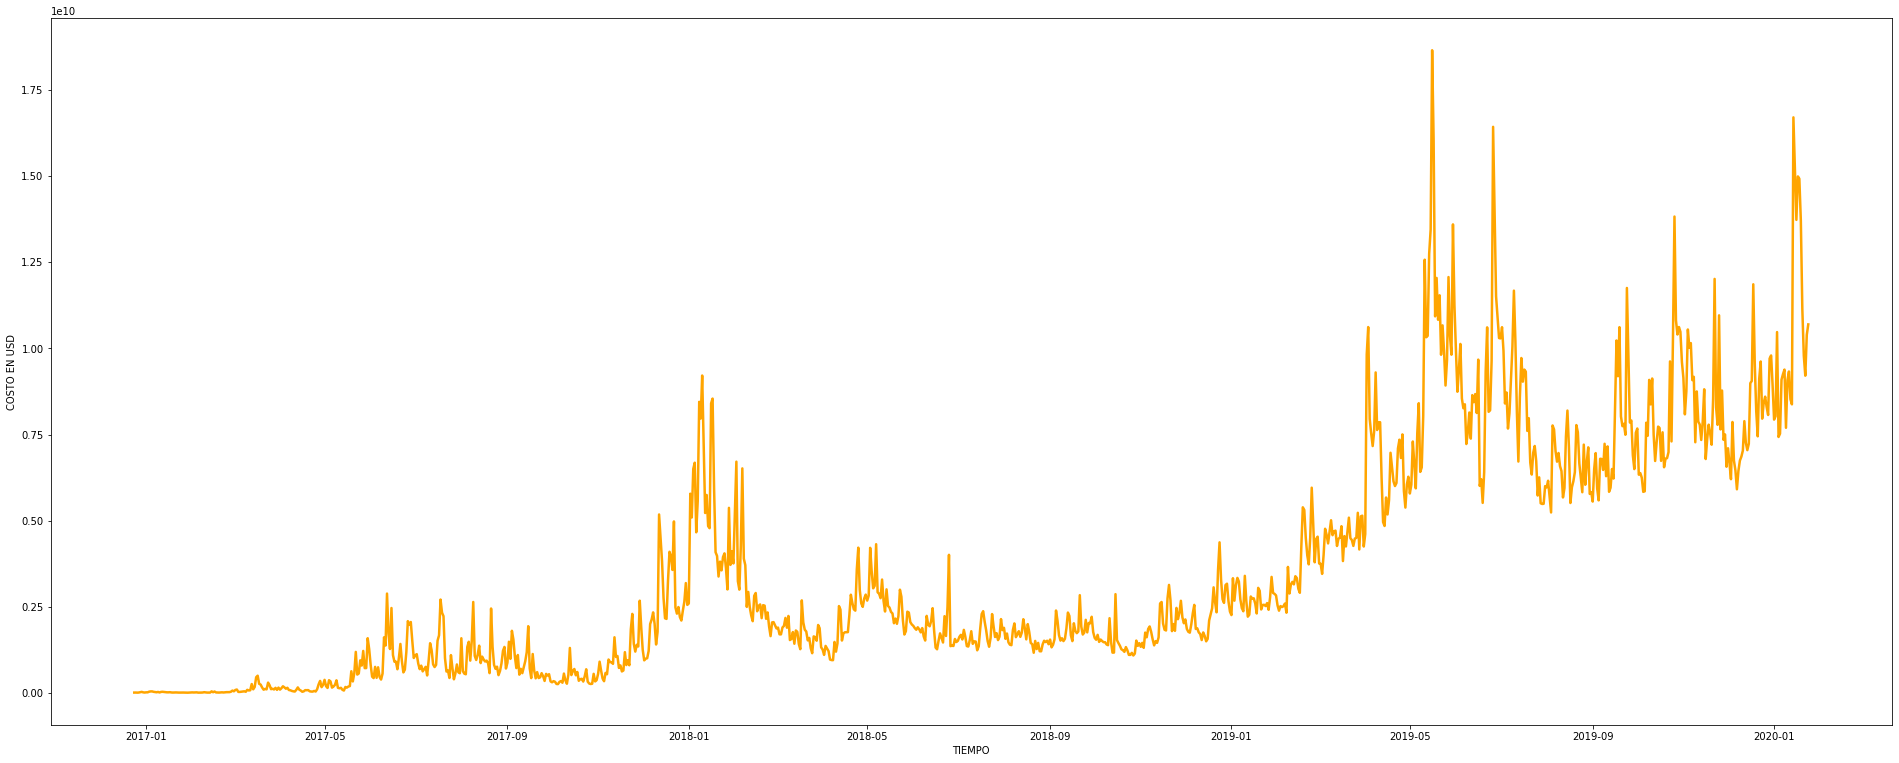

In [11]:
plt.figure(figsize=[33,13],edgecolor='black',frameon=False)
#degrees = 50
plt.xlabel('TIEMPO')
plt.ylabel('COSTO EN USD')
date = final3['Date']
ope = final3['Volume']
#plt.xticks(rotation=degrees)
plt.plot(date, ope,linewidth=2.5,color = 'orange' )

# dibujo de cada una de las columnas en relacion al tiempo

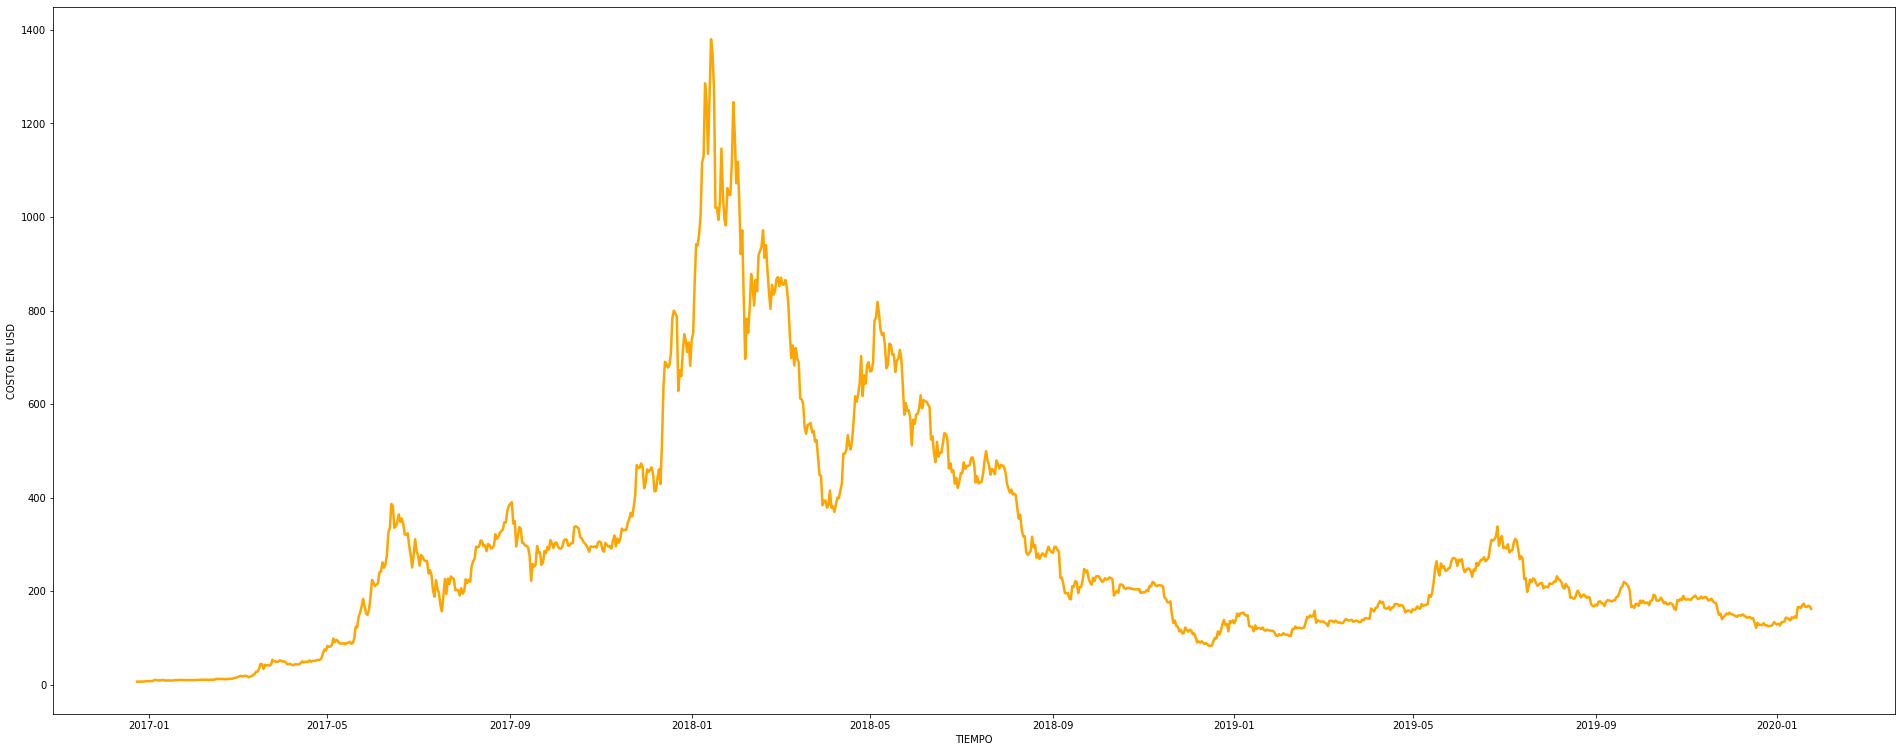

In [12]:
plt.figure(figsize=[33,13],edgecolor='black',frameon=False)
#degrees = 50
plt.xlabel('TIEMPO')
plt.ylabel('COSTO EN USD')
date = final3['Date']
ope = final3['Open']
#plt.xticks(rotation=degrees)
plt.plot(date, ope,linewidth=2.5,color = 'orange' )

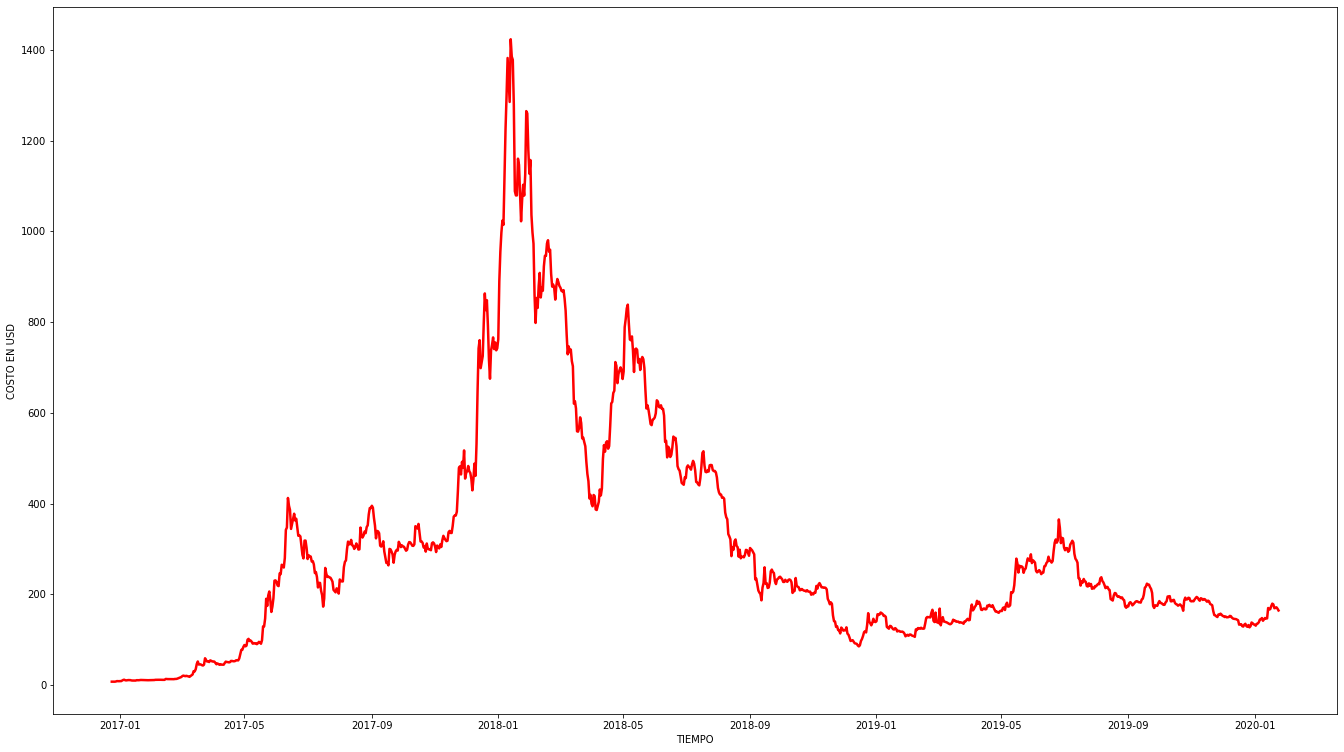

In [13]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
plt.xlabel('TIEMPO')
plt.ylabel('COSTO EN USD')
hig = final3['High']
plt.plot(date,hig,linewidth=2.5, color='red')

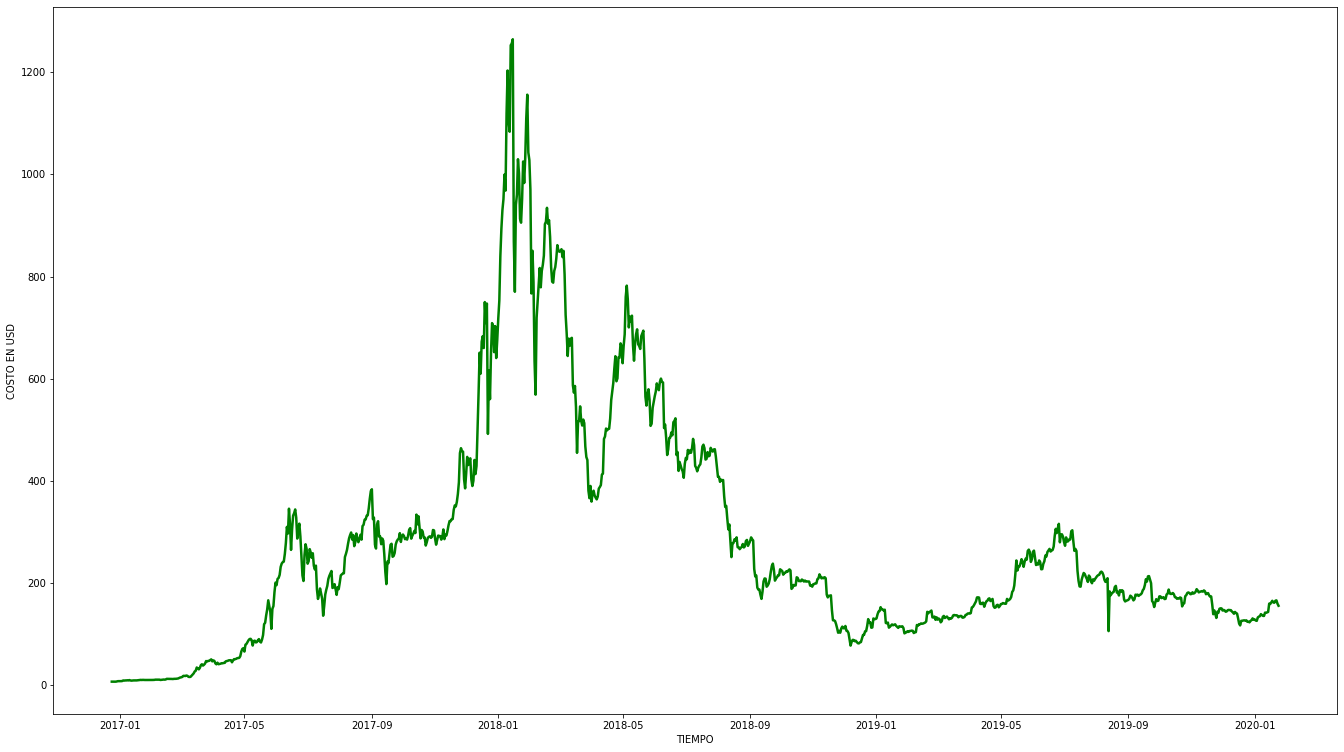

In [14]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
plt.xlabel('TIEMPO')
plt.ylabel('COSTO EN USD')
lo = final3['Low']
plt.plot(date,lo,linewidth=2.5, label='Low',c='green')
plt.show()

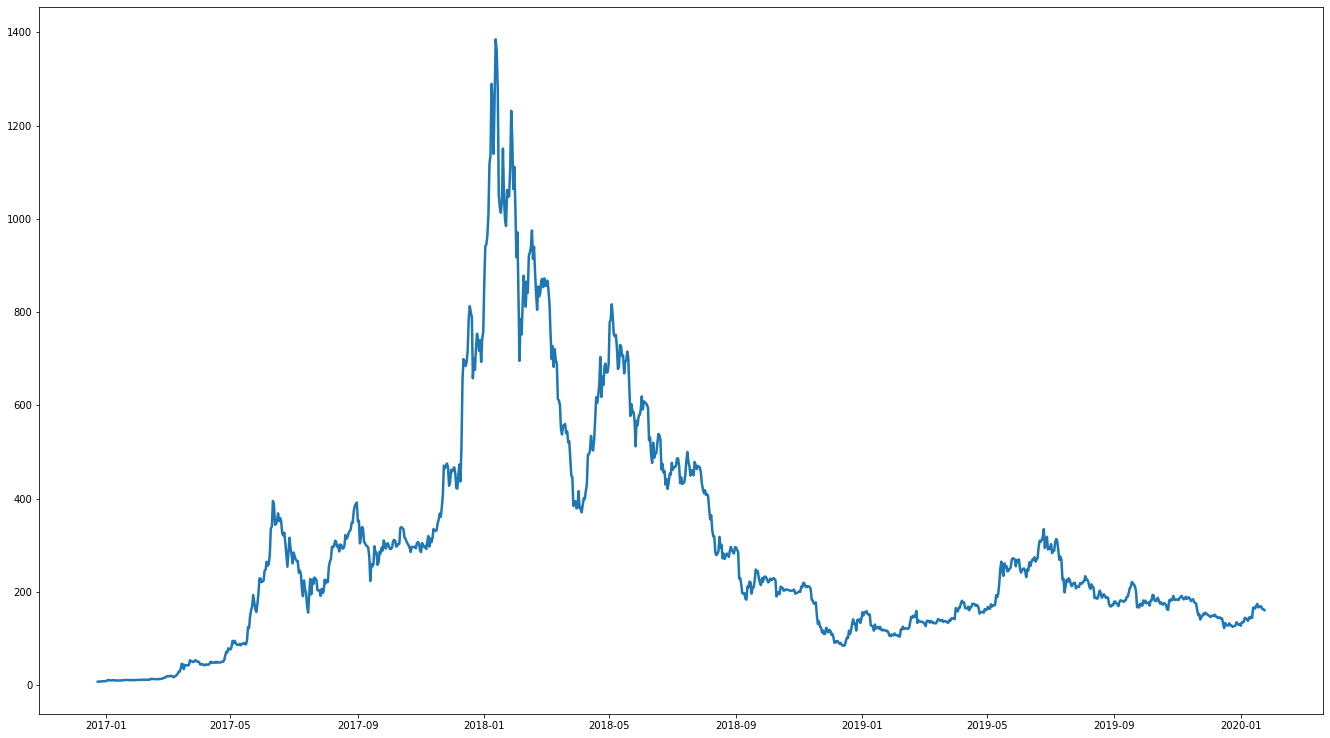

In [15]:
plt.figure(figsize=[23,13],frameon=False)
clo = final3['Close']
plt.plot(date,clo,linewidth=2.5)
plt.show()

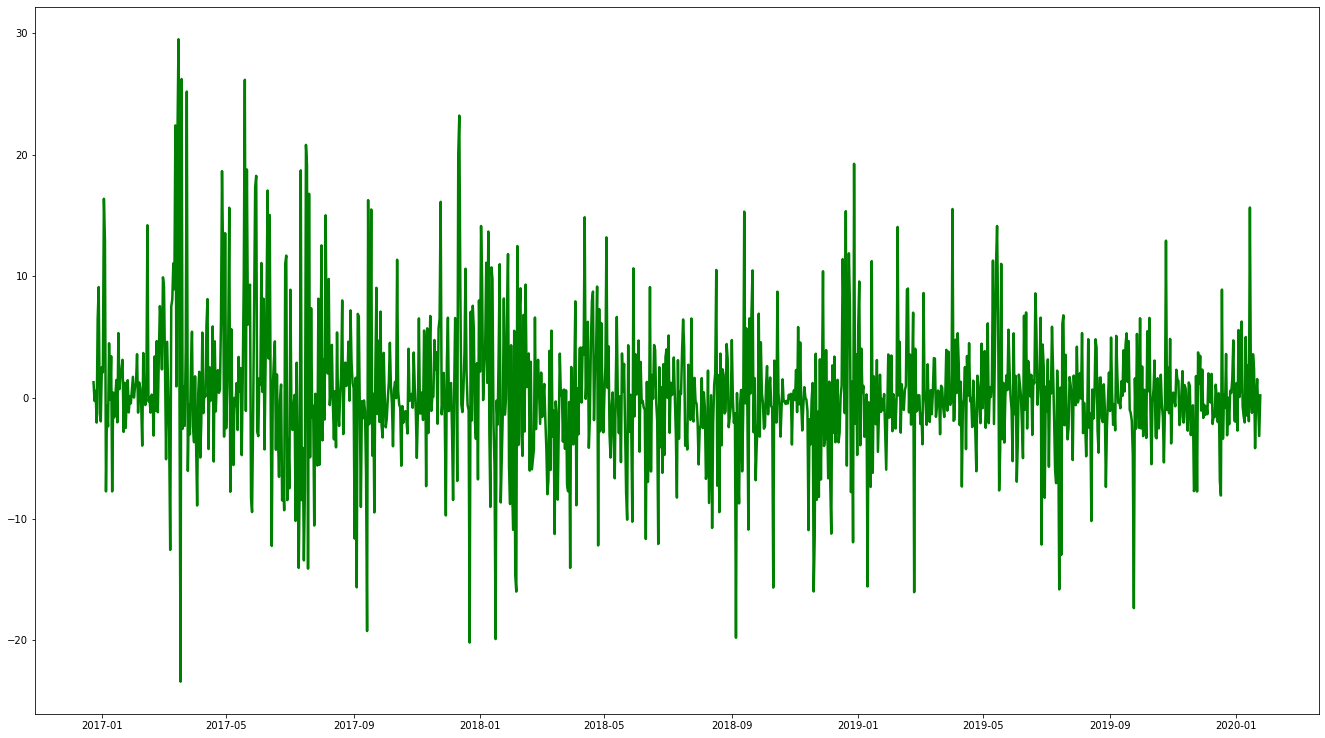

In [16]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
chang = final3['Change %']
plt.plot(date,chang,linewidth=2.5, label='Low',c='green')
plt.show()

In [17]:
# describe de el dataset 
final3

,Date,Price,Open,High,Low,Close,Adj Close,Vol.,Volume,Change %
0,2016-12-24,7.25,7.11,7.35,7.11,7.164,7.265770,56.77K,7626020,1.26
1,2016-12-25,7.23,7.25,7.32,7.17,7.212,7.175080,16.44K,8671840,-0.28
2,2016-12-26,7.27,7.11,7.35,7.05,7.142,7.274090,78.87K,5836810,0.55
3,2016-12-27,7.12,7.27,7.33,7.08,7.465,7.170820,40.80K,8778610,-2.06
4,2016-12-28,7.58,7.20,7.76,7.10,8.214,7.520110,177.26K,17453300,6.46
...,...,...,...,...,...,...,...,...,...,...
1122,2020-01-20,166.87,166.92,169.24,161.61,169.090,167.120514,11.30M,11144529787,-0.03
1123,2020-01-21,169.41,166.87,169.79,165.53,167.970,169.697159,11.52M,9789369362,1.52
1124,2020-01-22,168.13,169.41,171.27,166.19,162.510,168.294159,11.30M,9209827927,-0.76
1125,2020-01-23,162.80,168.15,168.25,159.78,162.400,162.928558,14.86M,10396868698,-3.17


In [18]:
pd.set_option('float_format', '{:f}'.format)
stats = round(final3.describe(),2)
stats = stats.drop('Volume', axis=1).T
stats

,count,mean,std,min,25%,50%,75%,max
Price,1127.000000,289.150000,241.290000,7.120000,139.460000,213.180000,338.620000,1380.000000
Open,1127.000000,289.020000,241.400000,7.110000,139.190000,213.100000,338.620000,1379.900000
High,1127.000000,300.740000,253.340000,7.320000,144.560000,220.530000,351.790000,1423.200000
Low,1127.000000,275.240000,226.280000,7.050000,135.600000,205.000000,324.750000,1264.400000
Close,1127.000000,289.830000,241.780000,7.140000,140.670000,211.660000,341.760000,1385.020000
Adj Close,1127.000000,291.270000,243.900000,7.170000,140.750000,212.230000,344.610000,1396.420000
Change %,1127.000000,0.440000,5.820000,-23.400000,-2.230000,0.050000,2.850000,29.510000


In [19]:
stats['IQR'] = stats['75%']-stats['25%']
cutoff = stats['IQR']*1.5
stats['LimiteSuperior']=stats['75%']+cutoff
stats['LimiteInferior']=(stats['25%']-cutoff)*(-1)
stats['Range'] = stats['LimiteSuperior']-stats['LimiteInferior']
stats

,count,mean,std,min,25%,50%,75%,max,IQR,LimiteSuperior,LimiteInferior,Range
Price,1127.000000,289.150000,241.290000,7.120000,139.460000,213.180000,338.620000,1380.000000,199.160000,637.360000,159.280000,478.080000
Open,1127.000000,289.020000,241.400000,7.110000,139.190000,213.100000,338.620000,1379.900000,199.430000,637.765000,159.955000,477.810000
High,1127.000000,300.740000,253.340000,7.320000,144.560000,220.530000,351.790000,1423.200000,207.230000,662.635000,166.285000,496.350000
Low,1127.000000,275.240000,226.280000,7.050000,135.600000,205.000000,324.750000,1264.400000,189.150000,608.475000,148.125000,460.350000
Close,1127.000000,289.830000,241.780000,7.140000,140.670000,211.660000,341.760000,1385.020000,201.090000,643.395000,160.965000,482.430000
Adj Close,1127.000000,291.270000,243.900000,7.170000,140.750000,212.230000,344.610000,1396.420000,203.860000,650.400000,165.040000,485.360000
Change %,1127.000000,0.440000,5.820000,-23.400000,-2.230000,0.050000,2.850000,29.510000,5.080000,10.470000,9.850000,0.620000


In [20]:
final3['Price'].index

RangeIndex(start=0, stop=1127, step=1)

In [21]:
new = stats.T
new

,Price,Open,High,Low,Close,Adj Close,Change %
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,289.150000,289.020000,300.740000,275.240000,289.830000,291.270000,0.440000
std,241.290000,241.400000,253.340000,226.280000,241.780000,243.900000,5.820000
min,7.120000,7.110000,7.320000,7.050000,7.140000,7.170000,-23.400000
25%,139.460000,139.190000,144.560000,135.600000,140.670000,140.750000,-2.230000
50%,213.180000,213.100000,220.530000,205.000000,211.660000,212.230000,0.050000
75%,338.620000,338.620000,351.790000,324.750000,341.760000,344.610000,2.850000
max,1380.000000,1379.900000,1423.200000,1264.400000,1385.020000,1396.420000,29.510000
IQR,199.160000,199.430000,207.230000,189.150000,201.090000,203.860000,5.080000
LimiteSuperior,637.360000,637.765000,662.635000,608.475000,643.395000,650.400000,10.470000


In [22]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
stats2 = stats.drop('count',axis=1)
cols = []
for i in stats2.columns:
    cols.append(i)
cols

['mean',
 'std',
 'min',
 '25%',
 '50%',
 '75%',
 'max',
 'IQR',
 'LimiteSuperior',
 'LimiteInferior',
 'Range']

<Figure size 1656x936 with 0 Axes>

In [23]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
stats3 = stats2

<Figure size 1656x936 with 0 Axes>

<BarContainer object of 11 artists>

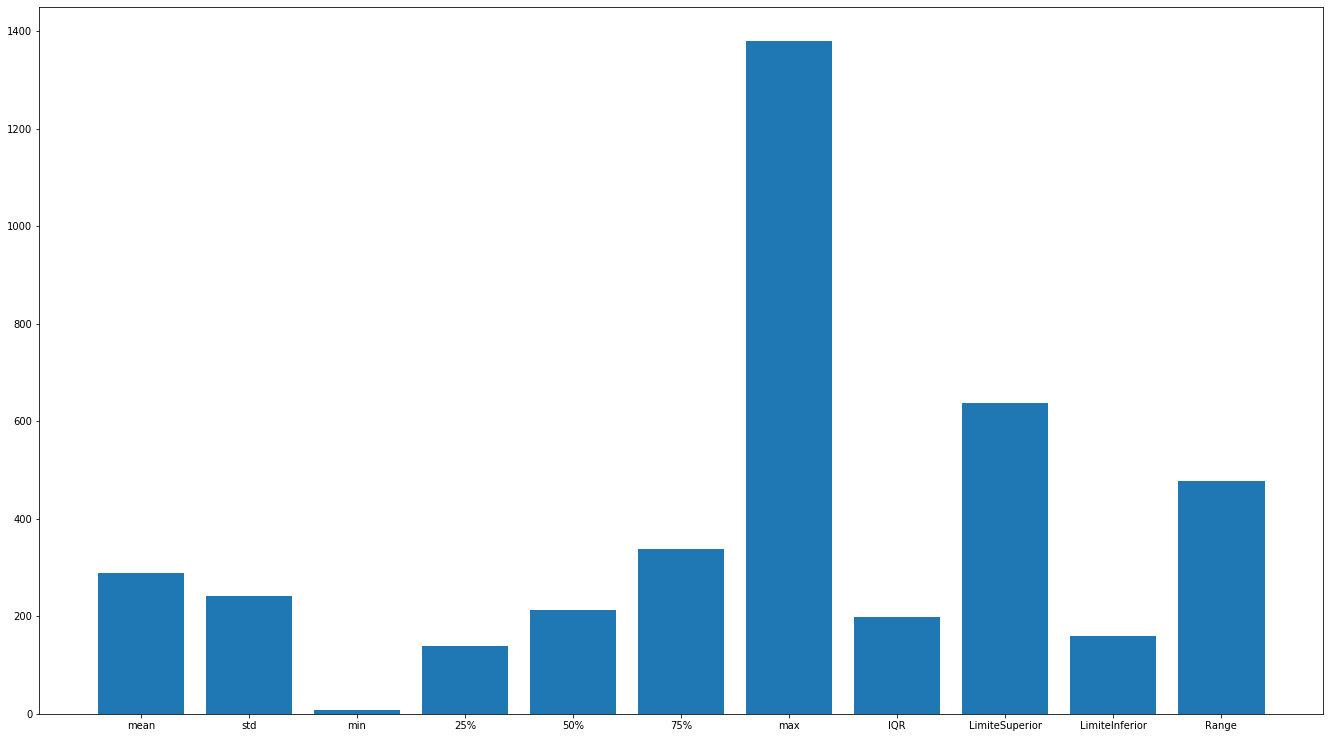

In [24]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
stats3 = stats2.T
plt.bar(cols,stats3['Price'])

In [25]:
price_final = final3.copy()
open_final = final3.copy()
high_final = final3.copy()
low_final = final3.copy()
close_final = final3.copy()
change_final = final3.copy()

# eliminar los outliers

# Price

In [26]:
price_final['Price'] = price_final['Price'].drop(price_final[price_final['Price']> new['Price']['LimiteSuperior']].index)
price_final['Price'] = price_final['Price'].drop(price_final[price_final['Price']< new['Price']['LimiteInferior']].index)
price_final = price_final.dropna().reset_index()
price_final = price_final.drop('index',axis=1)
price_final

,Date,Price,Open,High,Low,Close,Adj Close,Vol.,Volume,Change %
0,2017-05-23,168.240000,154.920000,174.300000,148.600000,193.030000,181.951996,507.16K,530708992,8.600000
1,2017-05-24,183.880000,168.240000,197.410000,166.330000,177.330000,190.046005,645.09K,561014016,9.300000
2,2017-05-25,168.710000,183.880000,206.060000,155.000000,162.830000,174.445999,862.96K,943636992,-8.250000
3,2017-05-28,161.910000,149.990000,172.790000,149.660000,194.170000,170.511002,643.59K,717971008,7.950000
4,2017-05-29,189.990000,161.910000,191.300000,155.010000,228.580000,194.908997,472.38K,718828032,17.340000
...,...,...,...,...,...,...,...,...,...,...
658,2020-01-20,166.870000,166.920000,169.240000,161.610000,169.090000,167.120514,11.30M,11144529787,-0.030000
659,2020-01-21,169.410000,166.870000,169.790000,165.530000,167.970000,169.697159,11.52M,9789369362,1.520000
660,2020-01-22,168.130000,169.410000,171.270000,166.190000,162.510000,168.294159,11.30M,9209827927,-0.760000
661,2020-01-23,162.800000,168.150000,168.250000,159.780000,162.400000,162.928558,14.86M,10396868698,-3.170000


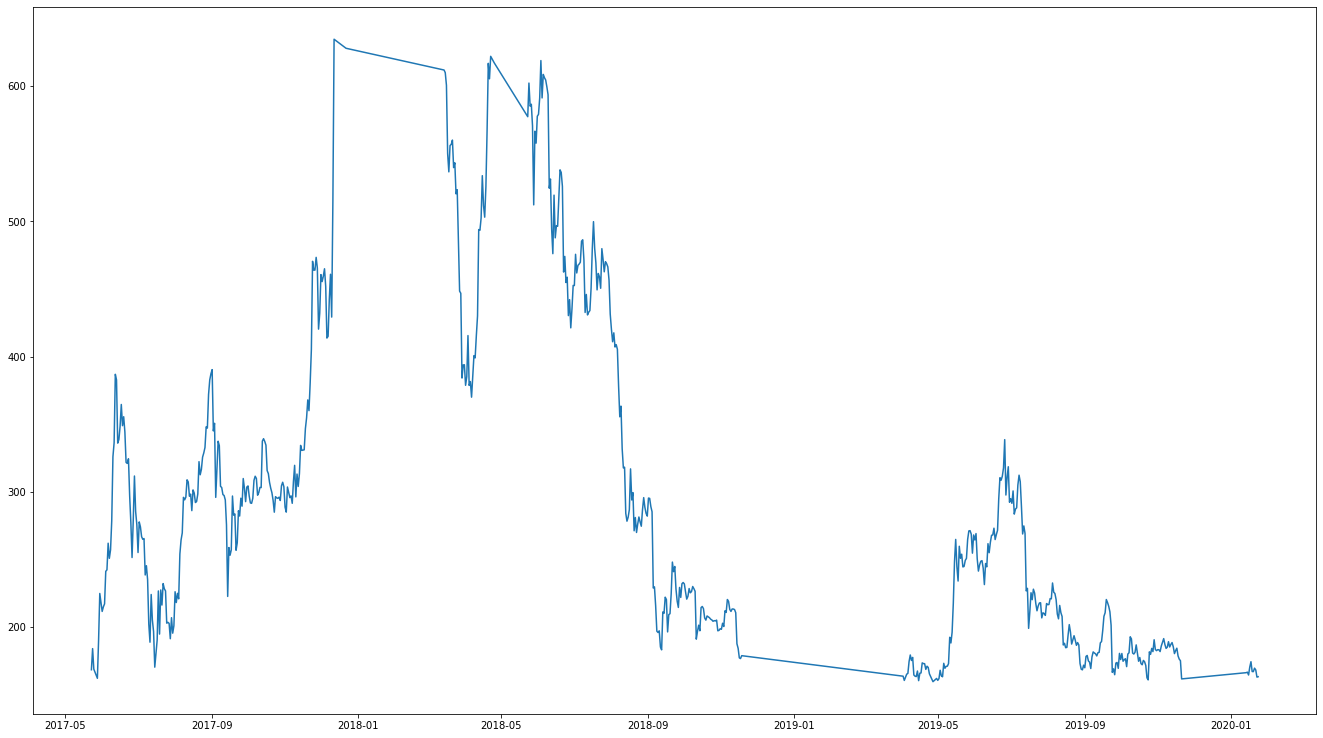

In [27]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
x = price_final['Date']
y = price_final['Price']
plt.plot(x,y)
plt.show()

# Open

In [28]:
open_final['Open'] = open_final['Open'].drop(open_final[open_final['Open']> new['Open']['LimiteSuperior']].index)
open_final['Open'] = open_final['Open'].drop(open_final[open_final['Open']<new['Open']['LimiteInferior']].index)
open_final = open_final.dropna().reset_index()
open_final = open_final.drop('index',axis=1)
open_final

,Date,Price,Open,High,Low,Close,Adj Close,Vol.,Volume,Change %
0,2017-05-24,183.880000,168.240000,197.410000,166.330000,177.330000,190.046005,645.09K,561014016,9.300000
1,2017-05-25,168.710000,183.880000,206.060000,155.000000,162.830000,174.445999,862.96K,943636992,-8.250000
2,2017-05-26,152.800000,168.710000,187.000000,143.640000,156.630000,160.403000,649.59K,792457984,-9.430000
3,2017-05-29,189.990000,161.910000,191.300000,155.010000,228.580000,194.908997,472.38K,718828032,17.340000
4,2017-05-30,224.690000,189.990000,229.980000,182.000000,228.640000,231.910995,757.87K,1586669952,18.260000
...,...,...,...,...,...,...,...,...,...,...
656,2020-01-20,166.870000,166.920000,169.240000,161.610000,169.090000,167.120514,11.30M,11144529787,-0.030000
657,2020-01-21,169.410000,166.870000,169.790000,165.530000,167.970000,169.697159,11.52M,9789369362,1.520000
658,2020-01-22,168.130000,169.410000,171.270000,166.190000,162.510000,168.294159,11.30M,9209827927,-0.760000
659,2020-01-23,162.800000,168.150000,168.250000,159.780000,162.400000,162.928558,14.86M,10396868698,-3.170000


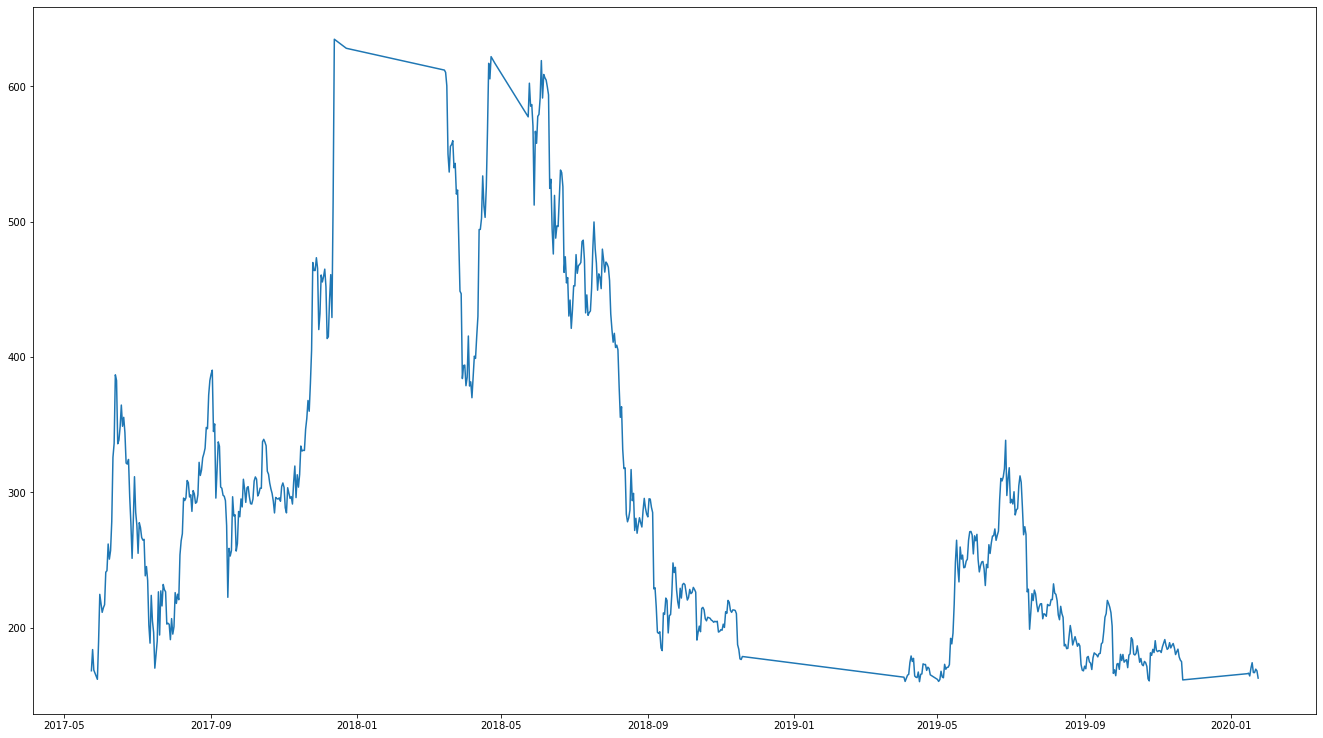

In [29]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
x = open_final['Date']
y = open_final['Open']
plt.plot(x,y)
plt.show()

# high_final

In [30]:
high_final['High'] = high_final['High'].drop(high_final[high_final['High']> new['High']['LimiteSuperior']].index)
high_final['High'] = high_final['High'].drop(high_final[high_final['High']<new['High']['LimiteInferior']].index)
high_final = high_final.dropna().reset_index()
high_final = high_final.drop('index', axis=1)
high_final

,Date,Price,Open,High,Low,Close,Adj Close,Vol.,Volume,Change %
0,2017-05-22,154.920000,146.140000,190.000000,136.800000,169.500000,174.261002,1.65M,1188909952,6.010000
1,2017-05-23,168.240000,154.920000,174.300000,148.600000,193.030000,181.951996,507.16K,530708992,8.600000
2,2017-05-24,183.880000,168.240000,197.410000,166.330000,177.330000,190.046005,645.09K,561014016,9.300000
3,2017-05-25,168.710000,183.880000,206.060000,155.000000,162.830000,174.445999,862.96K,943636992,-8.250000
4,2017-05-26,152.800000,168.710000,187.000000,143.640000,156.630000,160.403000,649.59K,792457984,-9.430000
...,...,...,...,...,...,...,...,...,...,...
651,2020-01-19,166.920000,174.170000,177.770000,162.040000,166.640000,166.969849,15.84M,13713374132,-4.170000
652,2020-01-20,166.870000,166.920000,169.240000,161.610000,169.090000,167.120514,11.30M,11144529787,-0.030000
653,2020-01-21,169.410000,166.870000,169.790000,165.530000,167.970000,169.697159,11.52M,9789369362,1.520000
654,2020-01-22,168.130000,169.410000,171.270000,166.190000,162.510000,168.294159,11.30M,9209827927,-0.760000


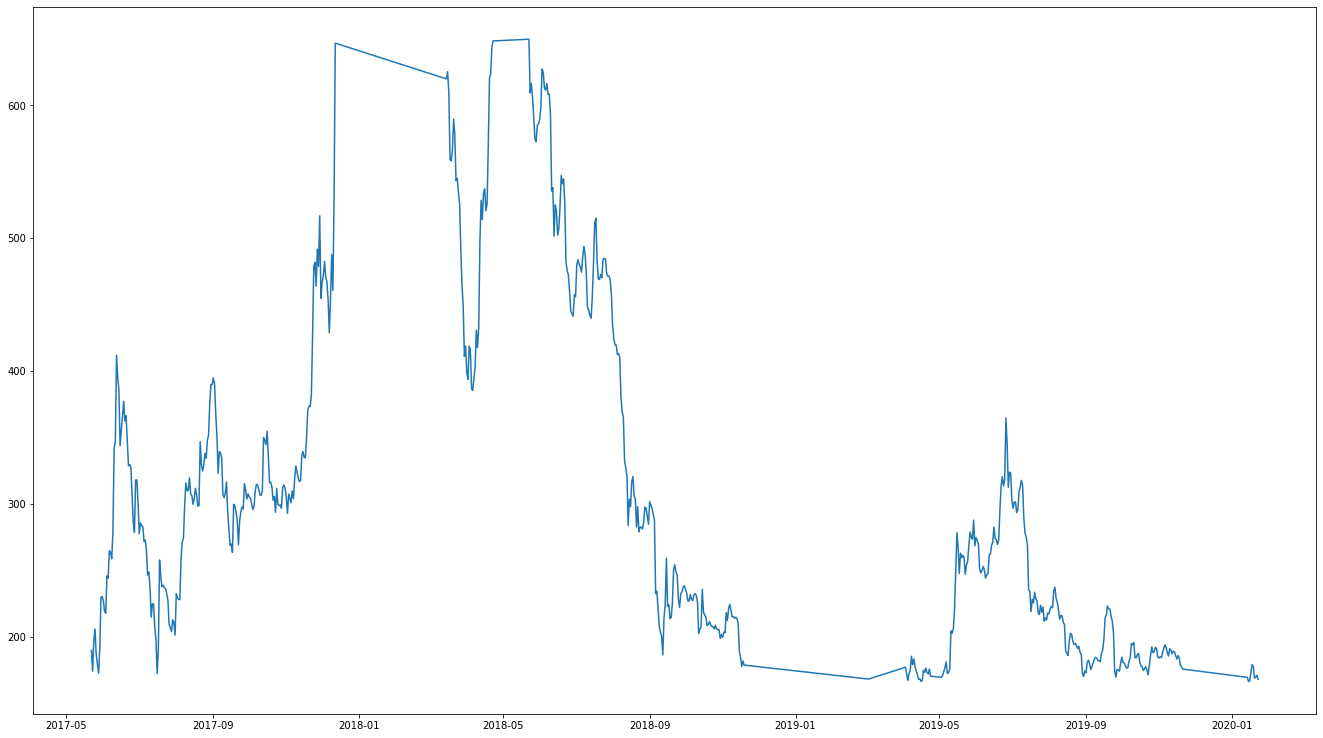

In [31]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
x = high_final['Date']
y = high_final['High']
plt.plot(x,y)
plt.show()

# low_final

In [32]:
low_final['Low'] = low_final['Low'].drop(low_final[low_final['Low']> new['Low']['LimiteSuperior']].index)
low_final['Low'] = low_final['Low'].drop(low_final[low_final['Low']<new['Low']['LimiteInferior']].index)
low_final = low_final.dropna().reset_index()
low_final = low_final.drop('index', axis=1)
low_final

,Date,Price,Open,High,Low,Close,Adj Close,Vol.,Volume,Change %
0,2017-05-23,168.240000,154.920000,174.300000,148.600000,193.030000,181.951996,507.16K,530708992,8.600000
1,2017-05-24,183.880000,168.240000,197.410000,166.330000,177.330000,190.046005,645.09K,561014016,9.300000
2,2017-05-25,168.710000,183.880000,206.060000,155.000000,162.830000,174.445999,862.96K,943636992,-8.250000
3,2017-05-28,161.910000,149.990000,172.790000,149.660000,194.170000,170.511002,643.59K,717971008,7.950000
4,2017-05-29,189.990000,161.910000,191.300000,155.010000,228.580000,194.908997,472.38K,718828032,17.340000
...,...,...,...,...,...,...,...,...,...,...
670,2020-01-20,166.870000,166.920000,169.240000,161.610000,169.090000,167.120514,11.30M,11144529787,-0.030000
671,2020-01-21,169.410000,166.870000,169.790000,165.530000,167.970000,169.697159,11.52M,9789369362,1.520000
672,2020-01-22,168.130000,169.410000,171.270000,166.190000,162.510000,168.294159,11.30M,9209827927,-0.760000
673,2020-01-23,162.800000,168.150000,168.250000,159.780000,162.400000,162.928558,14.86M,10396868698,-3.170000


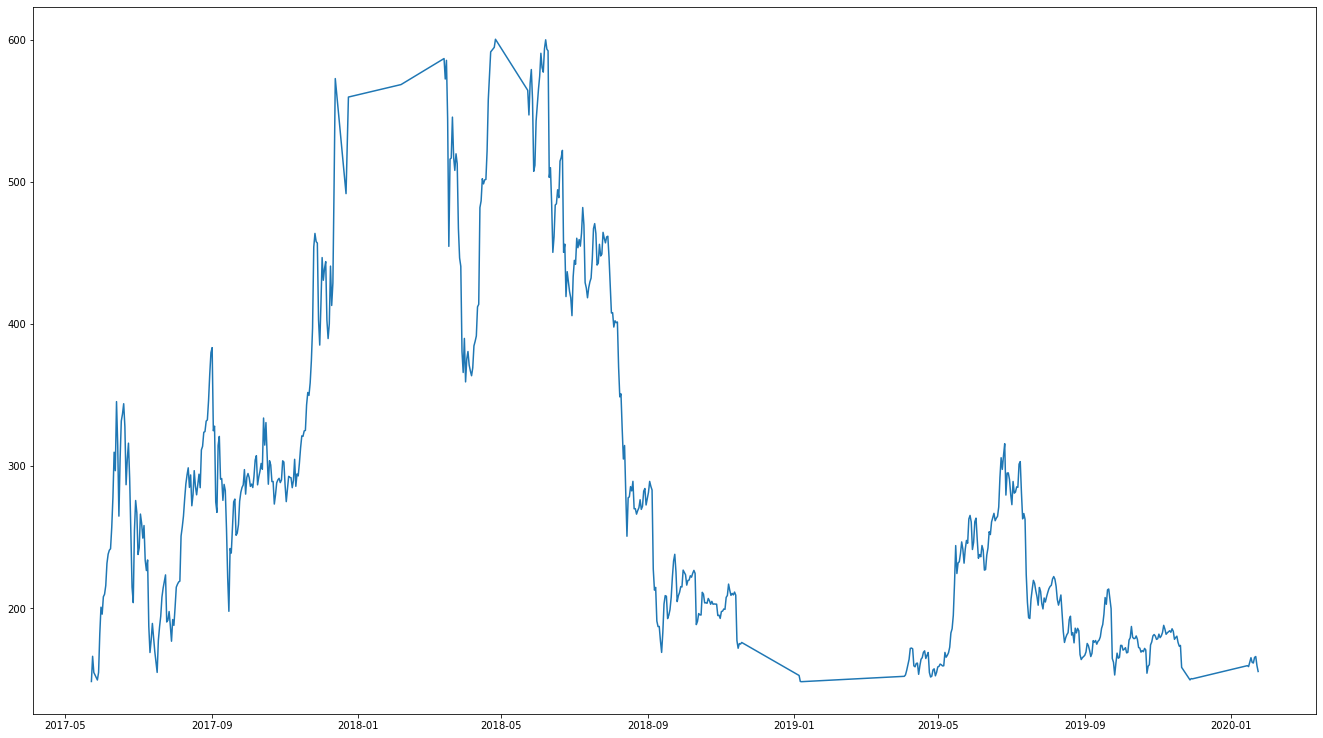

In [33]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
x = low_final['Date']
y = low_final['Low']
plt.plot(x,y)
plt.show()

# close_final

In [34]:
close_final['Close'] = close_final['Close'].drop(close_final[close_final['Close']> new['Low']['LimiteSuperior']].index)
close_final['Close'] = close_final['Close'].drop(close_final[close_final['Close']<new['Low']['LimiteInferior']].index)
close_final = close_final.dropna().reset_index()
close_final = close_final.drop('index',axis=1)
close_final

,Date,Price,Open,High,Low,Close,Adj Close,Vol.,Volume,Change %
0,2017-05-21,146.140000,123.030000,146.400000,122.320000,160.390000,157.936996,769.98K,570361024,18.780000
1,2017-05-22,154.920000,146.140000,190.000000,136.800000,169.500000,174.261002,1.65M,1188909952,6.010000
2,2017-05-23,168.240000,154.920000,174.300000,148.600000,193.030000,181.951996,507.16K,530708992,8.600000
3,2017-05-24,183.880000,168.240000,197.410000,166.330000,177.330000,190.046005,645.09K,561014016,9.300000
4,2017-05-25,168.710000,183.880000,206.060000,155.000000,162.830000,174.445999,862.96K,943636992,-8.250000
...,...,...,...,...,...,...,...,...,...,...
683,2020-01-20,166.870000,166.920000,169.240000,161.610000,169.090000,167.120514,11.30M,11144529787,-0.030000
684,2020-01-21,169.410000,166.870000,169.790000,165.530000,167.970000,169.697159,11.52M,9789369362,1.520000
685,2020-01-22,168.130000,169.410000,171.270000,166.190000,162.510000,168.294159,11.30M,9209827927,-0.760000
686,2020-01-23,162.800000,168.150000,168.250000,159.780000,162.400000,162.928558,14.86M,10396868698,-3.170000


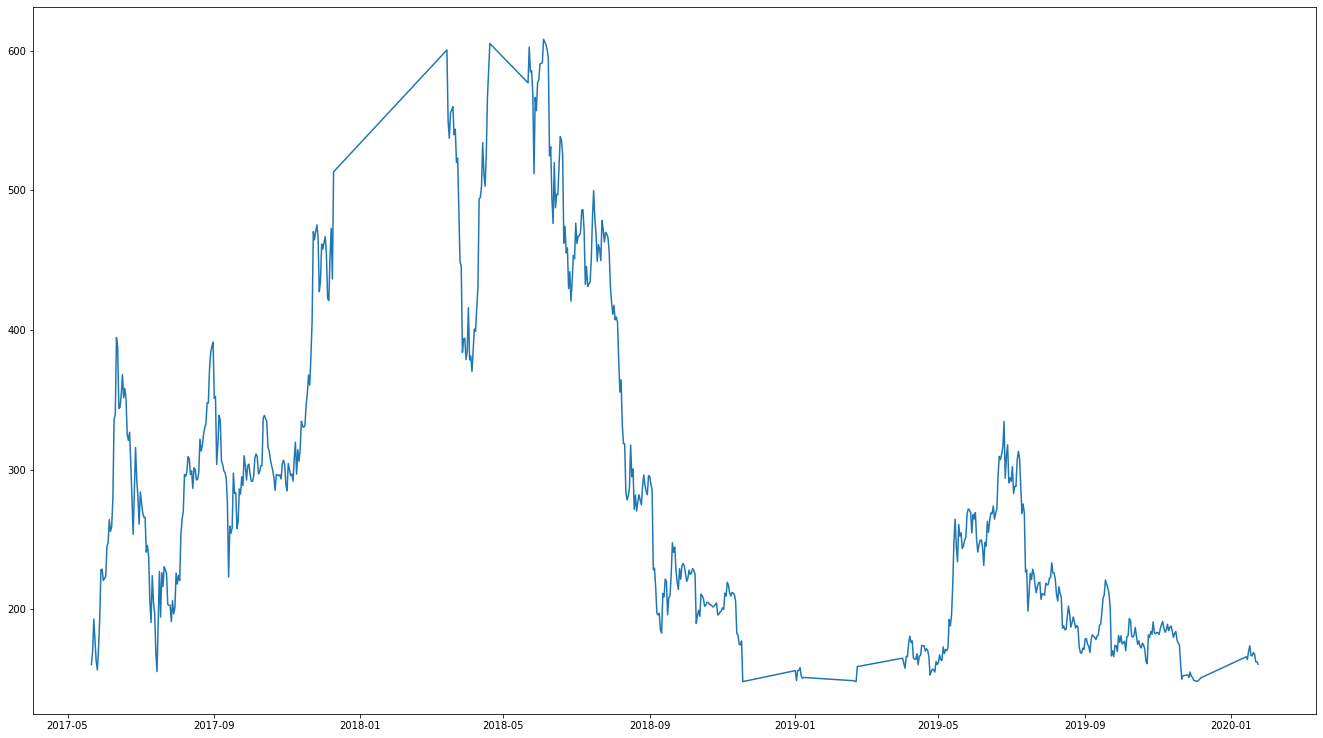

In [35]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
x = close_final['Date']
y = close_final['Close']
plt.plot(x,y)
plt.show()

# formula utilizada #no sirve

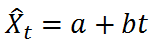

In [36]:
Image(filename='regre.png')

# Donde
# Xt = Pronostico del periodo
# a = interseccion de la linea con el eje
# b = pendiente
# t = periodo de tiempo

# Formula de la pendiente

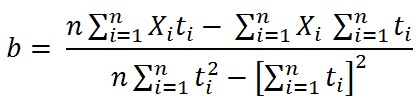

In [37]:
Image(filename='pendiente.png')

# Formula de la interseccion 

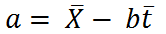

In [38]:
Image(filename='A.png')

# PRECIO

In [39]:
# sumatoria de la mutliplicacion del tiempo por el precio en dias 
tiempo = []
for i in range(len(price_final['Date'])):
    tiempo.append(i+1)
price = []
for e in price_final['Price']:
    price.append(e)
lst = []
new = list(zip(tiempo,price)) 
multi = []
for i in new:
     multi.append(i[0] * i[1])
sum_mult = sum(multi)
sum_mult

57509305.70000001

In [40]:
# sumatoria de los precios 
sum_price = round(sum(price),3)
sum_price

193330.14

In [41]:
# Sumatoria del tiempo
sum_time = sum(tiempo)
sum_time

220116

In [42]:
# N
total_time= len(price_final['Date'])

In [43]:
# Tiempo individual al cuadrado
time_sqr = []
for i in tiempo:
    time_sqr.append(i**2)
sum_time_sqr = sum(time_sqr)
sum_time_sqr

97364644

In [44]:
# suma de los tiempos al cuadrado
time_sqr = sum_time ** 2
time_sqr

48451053456

In [45]:
# Numero de datos
n = len(tiempo)
n

663

In [46]:
# pendiente
pendiente = ((n*(sum_mult)- (sum_price*sum_time)) / ((n*sum_time_sqr) - time_sqr))
pendiente

-0.27490177439536273

In [47]:
# media de el precio = x media
x_mean = final3['Price'].mean()

In [48]:
# media del tiempo 
t_mean = sum(range(len(final3['Date']))) / len(final3['Date'])
t_mean

563.0

In [49]:
#  a = x_mean -(b)(time_mean)
a = x_mean- (pendiente * t_mean)
a

443.9226803510488

In [50]:
# fina
X_T = a + (pendiente * 1128)
X_T

133.83347883307965

# OPEN

In [51]:
# sumatoria de la mutliplicacion del tiempo por el precio en dias 
tiempo = []
for i in range(len(open_final['Date'])):
    tiempo.append(i+1)
price = []
for e in open_final['Open']:
    price.append(e)
lst = []
new = list(zip(tiempo,price)) 
multi = []
for i in new:
     multi.append(i[0] * i[1])
sum_mult = sum(multi)
sum_mult

57284596.49999999

In [52]:
# sumatoria de los precios 
sum_price = round(sum(price),3)
sum_price

193008.3

In [53]:
# Sumatoria del tiempo
sum_time = sum(tiempo)
sum_time

218791

In [54]:
# N
total_time= len(open_final['Date'])

In [55]:
# Tiempo individual al cuadrado
time_sqr = []
for i in tiempo:
    time_sqr.append(i**2)
sum_time_sqr = sum(time_sqr)
sum_time_sqr

96486831

In [56]:
# suma de los tiempos al cuadrado
time_sqr = sum_time ** 2
time_sqr

47869501681

In [57]:
# Numero de datos
n = len(tiempo)
n

661

In [58]:
# pendiente
pendiente = ((n*(sum_mult)- (sum_price*sum_time)) / ((n*sum_time_sqr) - time_sqr))
pendiente

-0.2742821314321972

In [59]:
# media de el precio = x media
x_mean = final3['Price'].mean()

In [60]:
# media del tiempo 
t_mean = sum(range(len(final3['Date']))) / len(final3['Date'])
t_mean

563.0

In [61]:
#  a = x_mean -(b)(time_mean)
a = x_mean- (pendiente * t_mean)
a

443.5738213627867

In [62]:
# final 
X_T = a + (pendiente * 1128)
X_T

134.18357710726826